In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from utils.preprocessing import preprocess, split
datapath = "../data/JSB_Chorales/"
dataset, sizes, dictionaries, labels = preprocess(datapath)
k_folds = 5
splitted = split(dataset, k_folds)

In [4]:
len(dataset["dTseqs"][0])

92

# Optimizing FUNgram

In [5]:
from models.fungram import FUNgram
from utils.evaluation import evaluate_model

In [6]:
orders = [3, 6, 9, 12, 15, 18]

In [7]:
models = dict()
metrics = dict()
for order in orders:
    print "Order {}".format(order)
    models[order], metrics[order] = evaluate_model(splitted, FUNgram, order=order, sizes=sizes)

Order 3
{'order': 3, 'sizes': (25, 25, 54)}
3.65305335636
3.98457711086
3.61815551335
4.30449784691
3.6166573318
4.27403473
3.64195747573
4.11773969343
3.62914962151
4.21261497276
Order 6
{'order': 6, 'sizes': (25, 25, 54)}
2.03771104265
5.96577249174
2.05185923235
6.6031309672
2.05422059796
6.51448071022
2.0561577429
6.05008397118
2.04892491522
6.4508956838
Order 9
{'order': 9, 'sizes': (25, 25, 54)}
0.769699470098
8.04432809647
0.790278807421
8.53232732568
0.797861269281
8.32664597073
0.780848759126
8.09724618334
0.786187951931
8.4768945384
Order 12
{'order': 12, 'sizes': (25, 25, 54)}
0.330018291243
8.68742808545
0.340325123986
9.03278059563
0.340028386074
8.85192049944
0.333359354826
8.60485926213
0.337231413762
9.04295977449
Order 15
{'order': 15, 'sizes': (25, 25, 54)}
0.211310088745
8.87252432875
0.214250411999
9.19619652217
0.214410830325
8.98618406575
0.21142745499
8.78316796348
0.21600198913
9.18304087751
Order 18
{'order': 18, 'sizes': (25, 25, 54)}
0.169609755531
8.91782439

/Users/toroloco/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


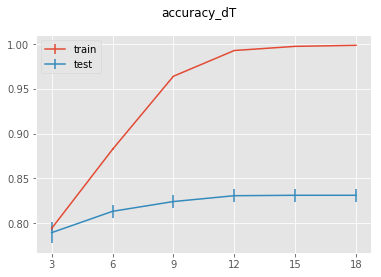

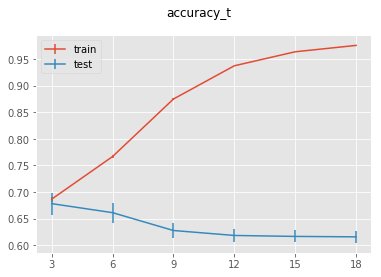

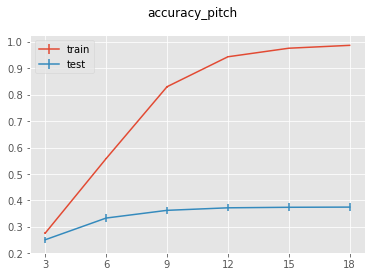

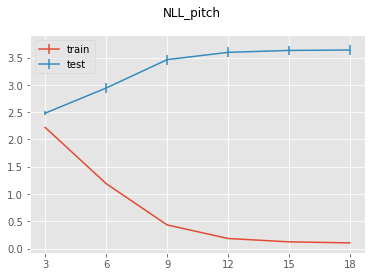

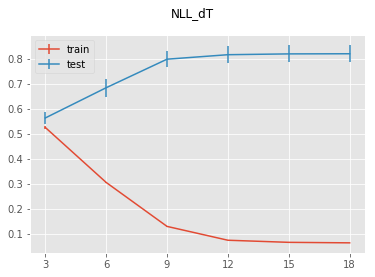

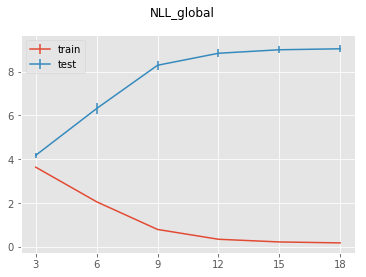

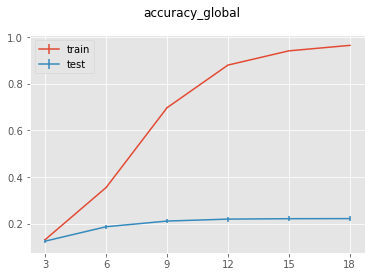

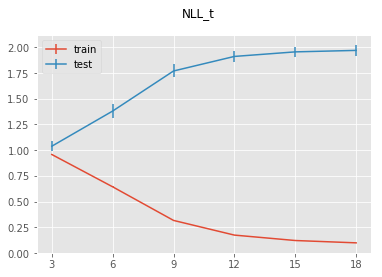

In [8]:
keys = metrics[3]['train'].keys()
for k in keys:
    fig, ax = plt.subplots()
    ax.set_xticks(orders)
    means_train = [np.mean(metrics[o]['train'][k]) for o in orders]
    stds_train = [np.std(metrics[o]['train'][k]) for o in orders]
    means_test = [np.mean(metrics[o]['test'][k]) for o in orders]
    stds_test = [np.std(metrics[o]['test'][k]) for o in orders]
    ax.errorbar(orders, means_train, stds_train, label='train')
    ax.errorbar(orders, means_test, stds_test, label='test')
    fig.suptitle(k)
    ax.legend()
    fig.show()

# INgram

In [11]:
from models.ingram import INgram

In [10]:
orders_in = [1,2,3,4,5]

In [12]:
models_in = dict()
metrics_in = dict()
for order in orders_in:
    print "Order {}".format(order)
    models_in[order], metrics_in[order] = evaluate_model(splitted, INgram, order=order)

Order 1
{'order': 1}
4.4473687821
4.39658576608
4.39818075443
4.6136327143
4.39801981351
4.60124083397
4.42632678266
4.47715209321
4.42666908168
4.51884076906
Order 2
{'order': 2}
3.71203404551
4.60904223598
3.6737834374
4.90463035271
3.66365235481
4.86365966845
3.69990901127
4.65550093732
3.70145840042
4.87055510069
Order 3
{'order': 3}
2.80372691823
5.74840343562
2.78477197323
6.04969797434
2.7692075281
5.98773619265
2.80155755921
5.81694488578
2.81204859465
6.10082501582
Order 4
{'order': 4}
2.16111841747
6.63012203158
2.13590525777
7.00355403667
2.12203240271
6.8374898202
2.15449252574
6.65812402348
2.16786353677
7.0331196299
Order 5
{'order': 5}
1.82889625906
7.18491694573
1.81063160861
7.5107572074
1.79628628498
7.37517295951
1.82512803756
7.17705637569
1.84095160761
7.45921061396


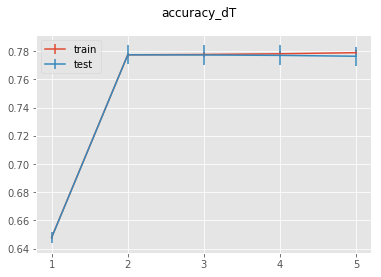

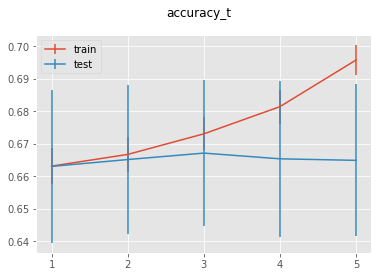

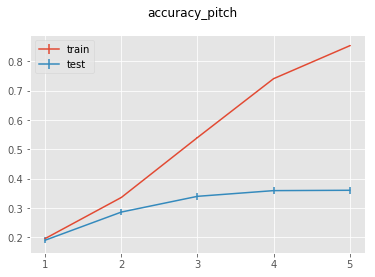

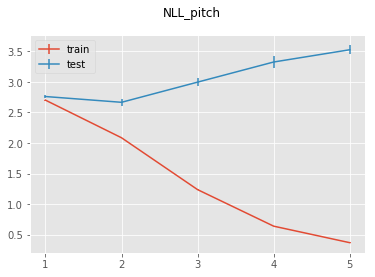

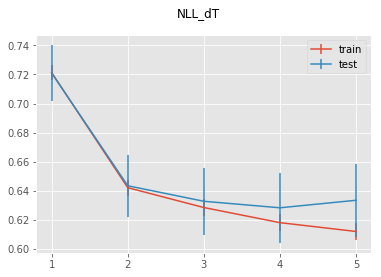

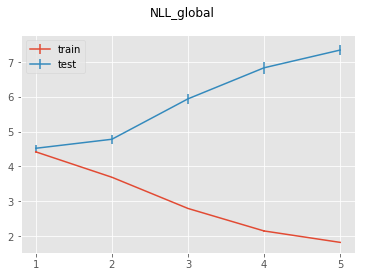

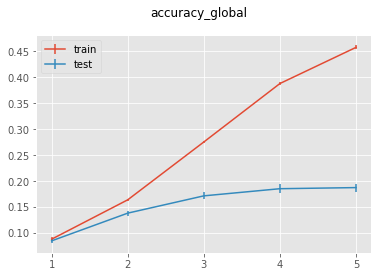

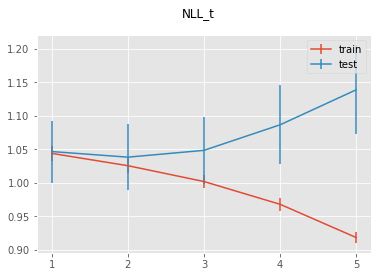

In [13]:
keys = metrics_in[3]['train'].keys()
for k in keys:
    fig, ax = plt.subplots()
    ax.set_xticks(orders_in)
    means_train = [np.mean(metrics_in[o]['train'][k]) for o in orders_in]
    stds_train = [np.std(metrics_in[o]['train'][k]) for o in orders_in]
    means_test = [np.mean(metrics_in[o]['test'][k]) for o in orders_in]
    stds_test = [np.std(metrics_in[o]['test'][k]) for o in orders_in]
    ax.errorbar(orders_in, means_train, stds_train, label='train')
    ax.errorbar(orders_in, means_test, stds_test, label='test')
    fig.suptitle(k)
    ax.legend()
    fig.show()

# Generation

In [14]:
selModelFun = models[9][0]
gen_data_fun = selModelFun.generate(n_songs=50, write_MIDI=True, dictionaries=dictionaries, path=datapath+"gen/")
selModelIn = models_in[3][0]
gen_data_in = selModelIn.generate(n_songs=50, write_MIDI=True, dictionaries=dictionaries, path=datapath+"gen/")

0.007408010862638871

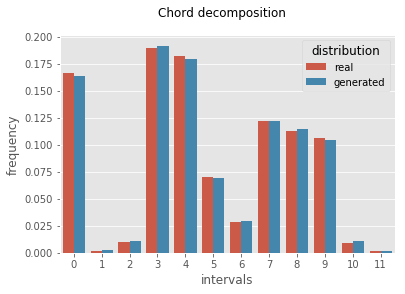

In [16]:
from utils.evaluation import analyze_chords
analyze_chords(dataset, gen_data_fun, show_plot=True)

0.23284150553679164

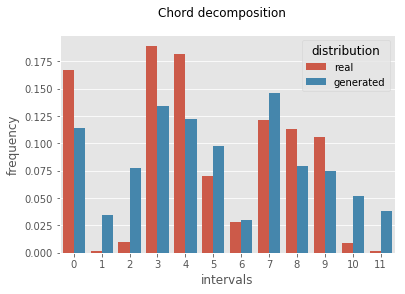

In [17]:
analyze_chords(dataset, gen_data_in, show_plot=True)

0.01094871600192225

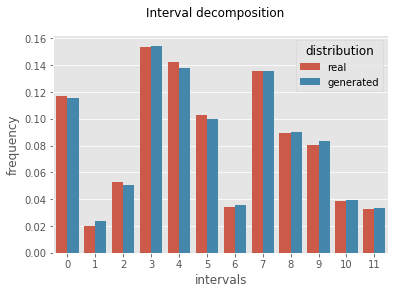

In [18]:
from utils.evaluation import analyze_intervals
analyze_intervals(dataset, gen_data_fun, show_plot=True)

0.01805889541537402

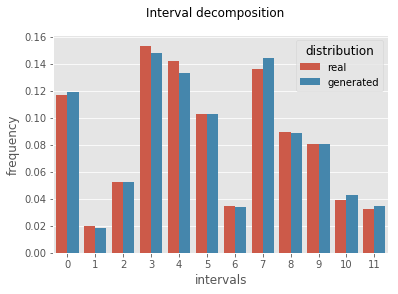

In [19]:
analyze_intervals(dataset, gen_data_in, show_plot=True)

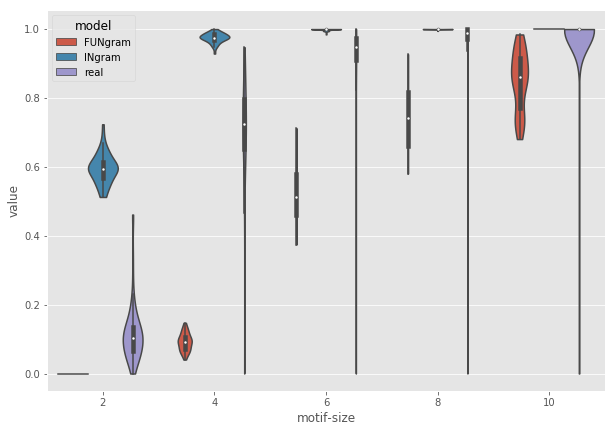

In [24]:
from utils.novelty import comparison_novelties
_ = comparison_novelties(splitted[0]['train'], [splitted[0]['test'], gen_data_fun, gen_data_in], 
                     ["real", "FUNgram", "INgram"], motifs=(2,4,6,8,10))